# Titanic

The aim is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

First we load the libraries we are going to use.

In [279]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Now we load the titanic data (source Kaggle):

In [225]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train['train'] = 1
test['train'] = 0
data = pd.concat([train,test])

In [226]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [227]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.0
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,NaN,"Sage, Mr. Douglas Bullen",male,NaN,NaN,NaN,347082,NaN,G6,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.0
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.0
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.0
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.0
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.0
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.0


In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


The dataset contains 891 rows and 12 columns, some of the columns contains NAs, so now we are going to check the NA distribution and count.

In [229]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train            0
dtype: int64

<AxesSubplot:>

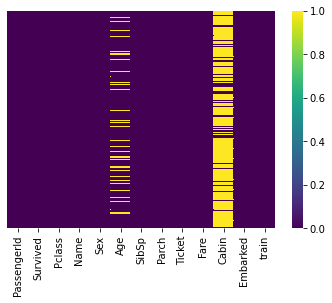

In [230]:
sns.heatmap(train.isnull(),yticklabels = False,cmap = 'viridis')

Now we are going to explore our data:

<AxesSubplot:xlabel='Age', ylabel='Count'>

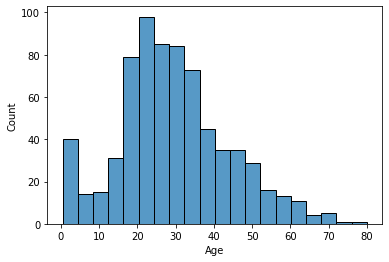

In [231]:
sns.histplot(x='Age',data=train)

Age looks fairly normal.

Lets explore the Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

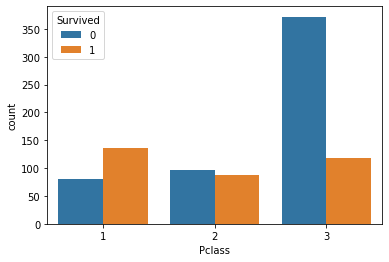

In [232]:
sns.countplot(x='Pclass',hue='Survived',data=train)

It looks like most of the people from the 3rd cabin didn't survive, in addition people from the 1st cabin had the highest chance of surviving.

<AxesSubplot:xlabel='Sex', ylabel='count'>

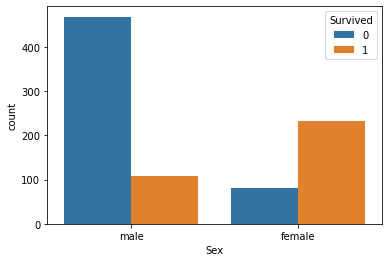

In [233]:
sns.countplot(x='Sex',hue='Survived',data=train)

According to sex females tend to survive more than males.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

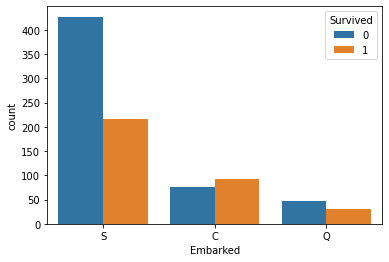

In [234]:
sns.countplot(x='Embarked',hue='Survived',data=train)

Embarked also seems to be a relevant variable.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

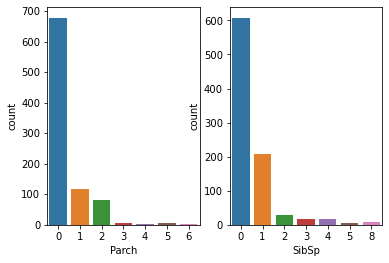

In [235]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Parch',data=train, ax=ax[0])
sns.countplot(x='SibSp',data=train, ax=ax[1])

## Feature Engineering

### Pclass

Pclass seems useful and it doesn't seem to require any changes, so we are going to leave Pclass as it is.

### PassengerID

PassengerID doesn't seem to be relevant so we are going to remove it

### Name

We are going to explore the different names and the prefixes.

In [236]:
train["Name"][0:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

The name prefix seems to be after the comma and there seems to be a dot next to it, so we are going to take every prefix.

In [237]:
train["Name"] = train["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [238]:
train["Name"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
the Countess      1
Don               1
Jonkheer          1
Capt              1
Lady              1
Ms                1
Sir               1
Mme               1
Name: Name, dtype: int64

There are too many different categories, in this case we are going to group the high class prefixes together.

In [239]:
train.loc[train.Name.isin(['Master','Dr','Rev','Col','Mlle','Major',
                           'the Countess', 'Capt', 'Don', 'Jonkheer', 'Mme','Lady', 'Sir', 'Ms']),"Name"] = "High Class"

In [240]:
train["Name"].value_counts()

Mr            517
Miss          182
Mrs           125
High Class     67
Name: Name, dtype: int64

Now we have separated between High Class and the rest of people.

### Sex

Sex variable seems fine as it is.

### Age



Sex variable seems fine as it is as it looks normally distributed.

### SibSp

We are going to modify this variable as, the person has siblings or not.

In [241]:
train.loc[train['SibSp'] >= 1,'SibSp'] = 1

### Parch

We are not going to modify Parch.

### Ticket

Lets explore the variable ticket.

In [242]:
train["Ticket"][0:20]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [243]:
train["Ticket"].apply(lambda x: x[0][0]).value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

There are too many possibilities, so we are going to group them into two categories, numerical or letter.

In [244]:
train["Ticket"] = train["Ticket"].apply(lambda x: "Numeric" if x[0][0].isnumeric() else "Letter")

In [245]:
train["Ticket"].value_counts()

Numeric    661
Letter     230
Name: Ticket, dtype: int64

### Fare

The fare variable is the cost of the ticket.

<AxesSubplot:ylabel='Frequency'>

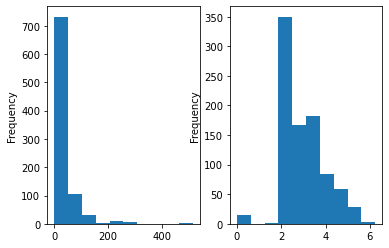

In [246]:
fig,ax = plt.subplots(1,2)
train.Fare.plot.hist(ax=ax[0])
np.log(train.Fare+1).plot.hist(ax=ax[1])

The log data seems to be more normal.

### Cabin

First we are going to explore the cabin variable.

In [247]:
train["Cabin"][0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

There seems to be many NaN values, so we are going to change the NaN to "Unknown"

In [248]:
train["Cabin"] = train["Cabin"].fillna("Unknown")

In [249]:
train["Cabin"].value_counts()

Unknown        687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
T                1
A24              1
B30              1
A20              1
B50              1
Name: Cabin, Length: 148, dtype: int64

There are 148 categories, so we are going to take only the first letter and check the number of categories.

In [250]:
train["Cabin"].apply(lambda x: x[0][0]).value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [251]:
train["Cabin"] = train["Cabin"].apply(lambda x: x[0][0])

There are many "Unknowns", although we are going to check the survivability in each cabin.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


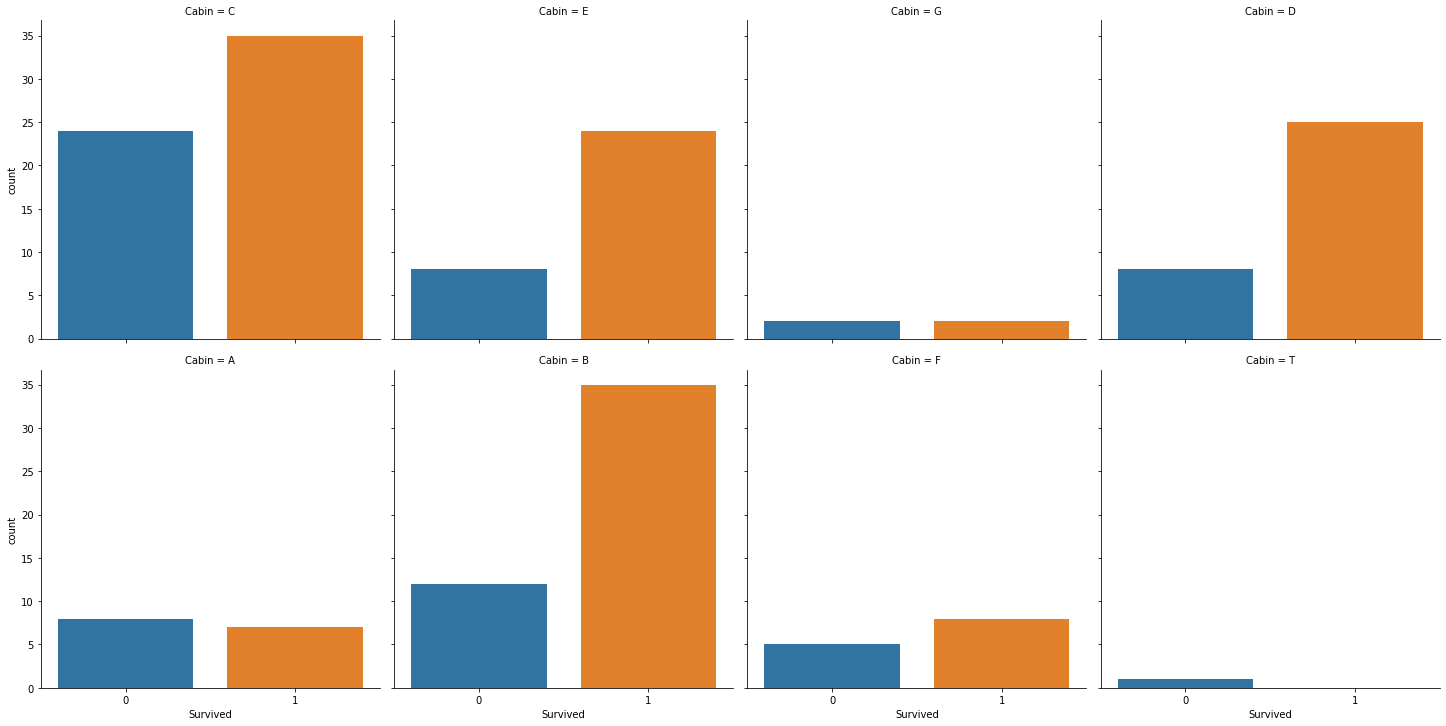

In [252]:
sns.catplot('Survived', col='Cabin', col_wrap=4, data=train.loc[train["Cabin"] != "U"], kind='count')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


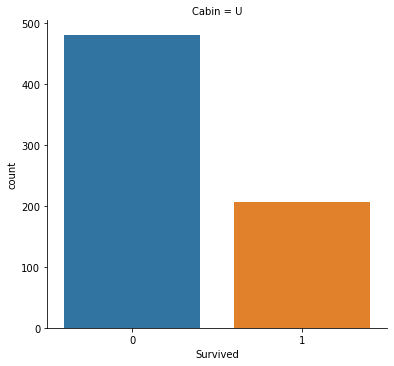

In [253]:
sns.catplot('Survived', col='Cabin', col_wrap=4, data=train.loc[train["Cabin"] == "U"], kind='count')

Cabin seems to be relevant, people who had an unknown cabin had less chances of surviving, there are also differences between the cabins.

### Embarked

The Embarked variable seems fine as it is.

### NAs

Now we have to deal with the rest of the NAs that haven't been imputed or removed.

In [254]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  train        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [255]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
train            0
dtype: int64

Age has 177 values, we are going to imput the mean (or median) as we cannot remove all of them.

In [256]:
train["Age"] = train.Age.fillna(train.Age.mean())

In [257]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
train          0
dtype: int64

In [258]:
train = train.dropna()

## Data Preprocessing

#### 1. Do transforms on all data.
#### 2. Impute data with mean/median for fare and age
#### 3. We are going to remove the non relevant predictors
#### 4. Scale data 

In [259]:
#Transformations performed in every predictor
data["Name"] = data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
data.loc[data.Name.isin(['Master','Dr','Rev','Col','Mlle','Major',
                           'the Countess', 'Capt', 'Don', 'Jonkheer', 'Mme','Lady', 'Sir', 'Ms']),"Name"] = "High Class"
data.loc[data['SibSp'] >= 1,'SibSp'] = 1
data["Ticket"] = data["Ticket"].apply(lambda x: "Numeric" if x[0][0].isnumeric() else "Letter")
data["Cabin"] = data["Cabin"].fillna("Unknown")
data["Cabin"] = data["Cabin"].apply(lambda x: x[0][0])

In [260]:
#impute na
#data.Age = data.Age.fillna(train.Age.mean())
data.Age = data.Age.fillna(train.Age.median())
#data.Fare = data.Fare.fillna(train.Fare.mean())
data.Fare = data.Fare.fillna(train.Fare.median())

In [261]:
#drop na
data.dropna(subset=['Embarked'],inplace = True)
data['Fare'] = np.log(data.Fare+1)

#convert to string to get dummies
data.Pclass = data.Pclass.astype(str)

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   object 
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        1307 non-null   object 
 11  Embarked     1307 non-null   object 
 12  train        1307 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 143.0+ KB


In [291]:
#create data set with dummies, dont take passengerID
dummies = pd.get_dummies(data[['Pclass','Name','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin','Ticket','train']])

#split
X_train = dummies[dummies.train == 1].drop(['train'], axis =1)
X_test = dummies[dummies.train == 0].drop(['train'], axis =1)
y_train = data[data.train==1].Survived.astype(int)

Now we scale the data

In [293]:
scaler = StandardScaler()
dummies_scaled = dummies.copy()
dummies_scaled[['Age','SibSp','Parch','Fare']]= scaler.fit_transform(dummies_scaled[['Age','SibSp','Parch','Fare']])
dummies_scaled

X_train_scaled = dummies_scaled[dummies_scaled.train == 1].drop(['train'], axis =1)
X_test_scaled = dummies_scaled[dummies_scaled.train == 0].drop(['train'], axis =1)

y_train = data[data.train==1].Survived.astype(int)

In [265]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,Mr,male,22.0,1,0,Letter,2.110213,U,S,1
1,2,1.0,1,Mrs,female,38.0,1,0,Letter,4.280593,C,C,1
2,3,1.0,3,Miss,female,26.0,0,0,Letter,2.188856,U,S,1
3,4,1.0,1,Mrs,female,35.0,1,0,Numeric,3.990834,C,S,1
4,5,0.0,3,Mr,male,35.0,0,0,Numeric,2.202765,U,S,1


## Model selection 

In [294]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [295]:
gnb = GaussianNB() #Naive Bayes
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.69662921 0.69662921 0.71910112 0.76404494 0.75280899 0.73033708
 0.7752809  0.75280899 0.79775281 0.73863636]
0.742402962206333


In [296]:
lr = LogisticRegression(max_iter = 2000) #Logistic Regression
cv = cross_val_score(lr,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.82022472 0.76404494 0.84269663 0.82022472 0.82022472
 0.82022472 0.79775281 0.87640449 0.79545455]
0.8132533197139938


In [297]:
knn = KNeighborsClassifier() #Knn 
cv = cross_val_score(knn,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.75280899 0.82022472 0.75280899 0.84269663 0.83146067 0.84269663
 0.7752809  0.80898876 0.86516854 0.80681818]
0.8098953013278856


In [298]:
rf = RandomForestClassifier(random_state = 33)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.84269663 0.75280899 0.84269663 0.86516854 0.86516854
 0.76404494 0.75280899 0.84269663 0.81818182]
0.8121552604698673


In [299]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.75280899 0.85393258 0.85393258 0.79775281
 0.79775281 0.78651685 0.83146067 0.84090909]
0.8155515832482125


In [300]:
xgb = XGBClassifier(random_state =33, use_label_encoder=False,verbosity=0)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[0.74157303 0.83146067 0.74157303 0.85393258 0.86516854 0.82022472
 0.83146067 0.80898876 0.84269663 0.81818182]
0.8155260469867212


In [301]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [302]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) 

[0.80898876 0.85393258 0.76404494 0.85393258 0.83146067 0.83146067
 0.80898876 0.79775281 0.88764045 0.86363636]
0.8301838610827375


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Hyperparameter Tuning

In [303]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [304]:
rf = RandomForestClassifier(random_state = 33)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 10, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   55.7s finished


In [305]:
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Best Score: 0.8313074565883554
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [306]:
rf = RandomForestClassifier(random_state = 33)
param_grid =  {'n_estimators': [50,100,150,200],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [5, 10, 15],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [3,4],
                                  'min_samples_split': [4,5]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   59.2s finished


In [307]:
clf_performance(best_clf_rf,'Random Forest')

Random Forest
Best Score: 0.8346654749744638
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [309]:
predictions = best_clf_rf.predict(X_test_scaled)
test = pd.read_csv('test.csv')
info = {'PassengerId': test['PassengerId'], 'Survived': predictions}
df = pd.DataFrame(info)
df.to_csv('gender_submission_py.csv',index=False)